# CSE3CI: Machine Learning - Assignment 2
Student Name: James Worcester\
Student Number: 20767086

## Preliminary: Download the data

### Note:
1. Since the Fashion MNIST dataset is a black and white image dataset, the shape of
the dataset is (dataset_length, 28,28). But to fit data into a conv2d layer, we need
to make the input shape comply with its required format: (batch_size,
image_width, image_depth, image_channels). Although batch_size can be
decided later when training it, we will still need to tell the number of image
channels here. Therefore, we can reshape the dataset into (dataset_length,
28,28,1).


2. When loading the fashion_mnist data, some students may meet an issue with an
error message ModuleNotFoundError: No module named 'tensorflow_core.estimator'.
You can solve this issue by making sure that both tensorflow and tensorflow-
estimator are in the same version in your anaconda environment. In this case, you
just need to downgrade tensorflow-estimator to 1.15.1.

In [85]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

## Preliminary: Verify and get information from the dataset

In [86]:
print('Loaded Fashion MNIST database with {} training and {} testing samples'.format(len(y_train), len(y_test)))

Loaded Fashion MNIST database with 60000 training and 10000 testing samples


In [87]:
#verify the data shape
x_train.shape
print('x_train shape is {}'.format(x_train.shape))
print('y_train shape is {}'.format(y_train.shape))
print('x_test shape is {}'.format(x_test.shape))
print('y_test shape is {}'.format(y_test.shape))



x_train shape is (60000, 28, 28, 1)
y_train shape is (60000,)
x_test shape is (10000, 28, 28, 1)
y_test shape is (10000,)


In [88]:
#verify how many classes are in the dataset
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [89]:
#check the different input values from the x_train set
import numpy as np
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

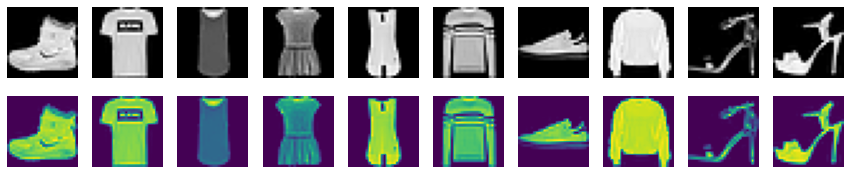

In [90]:
#check what some of the images look like from a random sample of 10 training images
import matplotlib.pyplot as plt
%matplotlib inline

# lets choose some random sample of 10 training images
fig, axarr = plt.subplots(2,10, figsize=(15,3))
for i in range(10):
    axarr[0,i].imshow(x_train[i],cmap='gray')
    axarr[0,i].axis('off')
    axarr[1,i].imshow(x_train[i])
    axarr[1,i].axis('off')
plt.show()

## Task 1: Build a Neural Network WITHOUT Convolutional Layers & Change the Model Structure
1. Build a neural network without convolutional layers to do the classification task (hint: you will need the use of dense layers). Then, you can change the model structure (i.e., number of dense layers, number of neurons in dense layers, or activation functions), to be able to improve network performance.

In [139]:
#import packages
import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

#load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

#normalize inputs from 0-255 to 0.0-1.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

#encode the outputs with one-hot-coding
y_train = np_utils.to_categorical(y_train) #Converts a class vector (integers) to binary class matrix
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### Task 1: Model 1 - Initial Model

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_72 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_244 (Dense)            (None, 10)                7850      
_________________________________________________________________
dense_245 (Dense)            (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.9710 - accuracy: 0.6800 - val_loss: 0.7131 - val_accuracy: 0.7608
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.6331 - accuracy: 0.7921 - val_loss: 0.6130 - val_accuracy: 0.7948
Epoch 3/5
60000/60000 [================

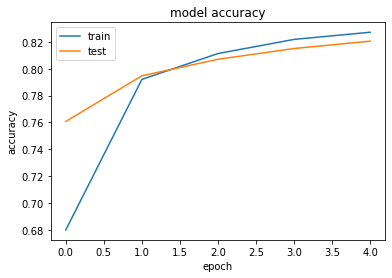

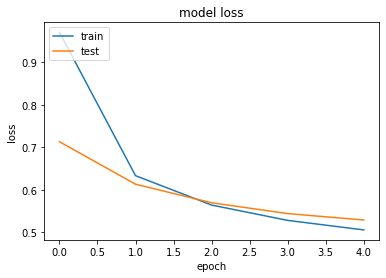

In [180]:
# Build the initial model with 1 hidden layer
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1))) #flatten the image into a vector
model.add(Dense(10)) #hidden layer with 10 nodes
model.add(Dense(num_classes, activation='softmax')) #(refer to Lecture 6): output layer with 10 nodes uses softmax as the activation function because this is a multi-class classification problem

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
#change up batch size from SGD to mini-batch to full gradient
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Task 1: Experiments Inbetween Models

#### Experiment 1: increasing the number of neurons in the hidden dense layer from 10 to 512

Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_73 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_246 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_247 (Dense)            (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.7502 - accuracy: 0.7558 - val_loss: 0.5971 - val_accuracy: 0.7970
Epoch 2/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.5406 - accuracy: 0.8201 - val_loss: 0.5379 - val_accuracy: 0.8175
Epoch 3/5
60000/60000 [============

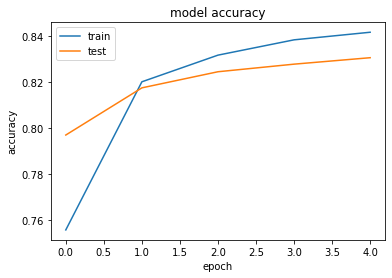

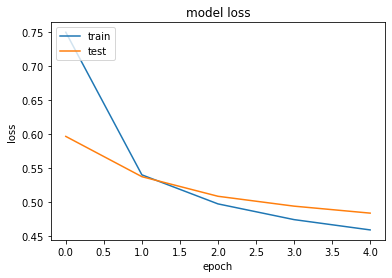

In [181]:
# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1))) #flatten the image into a vector
model.add(Dense(512)) #hidden layer with 512 nodes
model.add(Dense(num_classes, activation='softmax')) #(refer to Lecture 6): output layer with 10 nodes uses softmax as the activation function because this is a multi-class classification problem

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
#change up batch size from SGD to mini-batch to full gradient
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Experiment 2: Using two hidden layers of 10 neurons each

Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_74 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_248 (Dense)            (None, 10)                7850      
_________________________________________________________________
dense_249 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_250 (Dense)            (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.9444 - accuracy: 0.6691 - val_loss: 0.6802 - val_accuracy: 0.7545
Epoch 2/5
60000/60000 [==============================

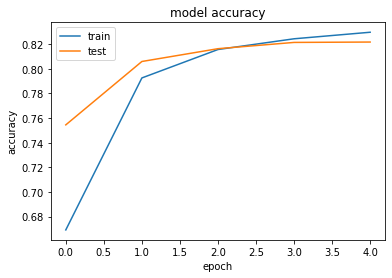

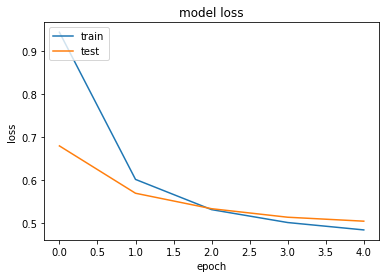

In [182]:
# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1))) #flatten the image into a vector
model.add(Dense(10)) #hidden layer with 10 nodes
model.add(Dense(10))
model.add(Dense(num_classes, activation='softmax')) #(refer to Lecture 6): output layer with 10 nodes uses softmax as the activation function because this is a multi-class classification problem

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
#change up batch size from SGD to mini-batch to full gradient
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Experiment 3: Using four hidden layers of decreasing number of neurons (50, 30, 20, 10)

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_75 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_251 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_252 (Dense)            (None, 30)                1530      
_________________________________________________________________
dense_253 (Dense)            (None, 20)                620       
_________________________________________________________________
dense_254 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_255 (Dense)            (None, 10)                110       
Total params: 41,720
Trainable params: 41,720
Non-trainable params: 0
_________________________________________________

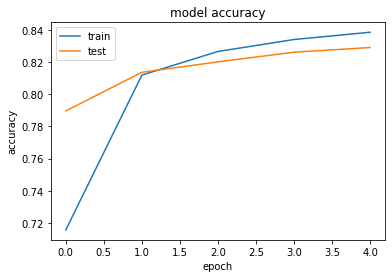

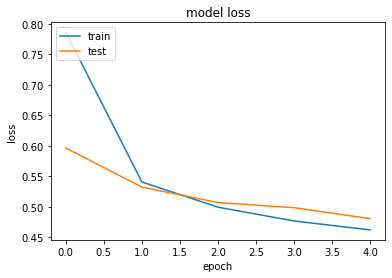

In [183]:
# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1))) #flatten the image into a vector
model.add(Dense(50))
model.add(Dense(30))
model.add(Dense(20))
model.add(Dense(10))

model.add(Dense(num_classes, activation='softmax')) #(refer to Lecture 6): output layer with 10 nodes uses softmax as the activation function because this is a multi-class classification problem

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
#change up batch size from SGD to mini-batch to full gradient
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Experiment 4: Using four hidden layers of decreasing number of neurons (50, 30, 20, 10) with different activation functions

Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_76 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_256 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_257 (Dense)            (None, 30)                1530      
_________________________________________________________________
dense_258 (Dense)            (None, 20)                620       
_________________________________________________________________
dense_259 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_260 (Dense)            (None, 10)                110       
Total params: 41,720
Trainable params: 41,720
Non-trainable params: 0
_________________________________________________

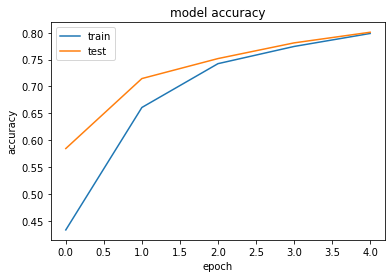

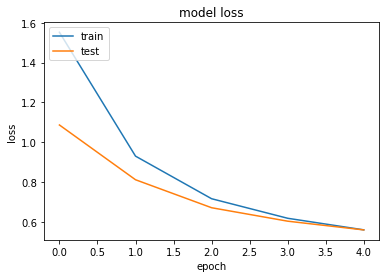

In [184]:
# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1))) #flatten the image into a vector
model.add(Dense(50, activation='relu')) #hidden layer with 10 nodes that captures the input shape of (28, 28, 1)
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(10))
model.add(Dense(num_classes, activation='softmax')) #(refer to Lecture 6): output layer with 10 nodes uses softmax as the activation function because this is a multi-class classification problem

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
#change up batch size from SGD to mini-batch to full gradient
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Experiment 5: Using four hidden layers of decreasing number of neurons (100, 50, 20, 10) with sigmoid and then relu activation functions

Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_77 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_261 (Dense)            (None, 100)               78500     
_________________________________________________________________
dense_262 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_263 (Dense)            (None, 20)                1020      
_________________________________________________________________
dense_264 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_265 (Dense)            (None, 10)                110       
Total params: 84,890
Trainable params: 84,890
Non-trainable params: 0
_________________________________________________

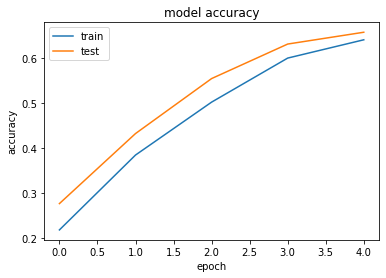

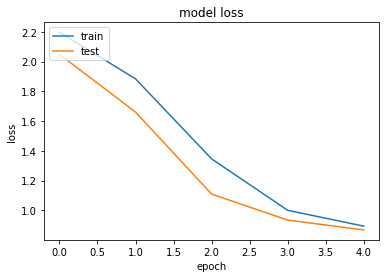

In [185]:
# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1))) #flatten the image into a vector
model.add(Dense(100, activation='sigmoid')) #hidden layer with 100 nodes
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(num_classes, activation='softmax')) #(refer to Lecture 6): output layer with 10 nodes uses softmax as the activation function because this is a multi-class classification problem

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
#change up batch size from SGD to mini-batch to full gradient
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Experiment 6: Using four hidden layers (50, 100, 20, 10) with sigmoid and then relu activation functions

Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_78 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_266 (Dense)            (None, 50)                39250     
_________________________________________________________________
dense_267 (Dense)            (None, 100)               5100      
_________________________________________________________________
dense_268 (Dense)            (None, 20)                2020      
_________________________________________________________________
dense_269 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_270 (Dense)            (None, 10)                110       
Total params: 46,690
Trainable params: 46,690
Non-trainable params: 0
_________________________________________________

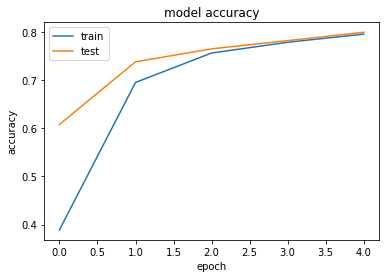

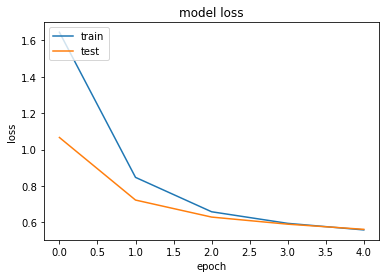

In [186]:
# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1))) #flatten the image into a vector
model.add(Dense(50, activation='sigmoid')) #hidden layer with 10 nodes that captures the input shape of (28, 28, 1)
model.add(Dense(100, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10))

model.add(Dense(num_classes, activation='softmax')) #(refer to Lecture 6): output layer with 10 nodes uses softmax as the activation function because this is a multi-class classification problem

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
#change up batch size from SGD to mini-batch to full gradient
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Experiment 7: Same as Experiment 6 but utilising two dropout layers

Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_79 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_271 (Dense)            (None, 50)                39250     
_________________________________________________________________
dropout_15 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_272 (Dense)            (None, 100)               5100      
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_273 (Dense)            (None, 20)                2020      
_________________________________________________________________
dense_274 (Dense)            (None, 10)              

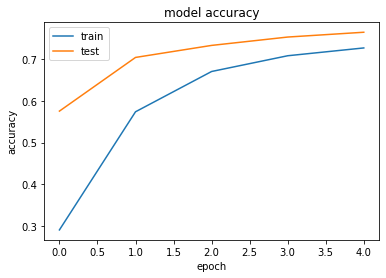

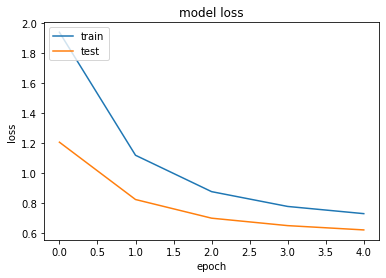

In [187]:
# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1))) #flatten the image into a vector
model.add(Dense(50, activation='sigmoid')) #hidden layer with 10 nodes that captures the input shape of (28, 28, 1)
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dense(10))

model.add(Dense(num_classes, activation='softmax')) #(refer to Lecture 6): output layer with 10 nodes uses softmax as the activation function because this is a multi-class classification problem

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
#change up batch size from SGD to mini-batch to full gradient
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Task 1: Model 2 - Better Accuracy

The second model for task 1 is based on the best performing experimental model above: Experiment 1

Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_83 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_281 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_282 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_283 (Dense)            (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.8392 - accuracy: 0.7338 - val_loss: 0.6013 - val_accuracy: 0.7921
Epoch 2/5
60000/60000 [==========================

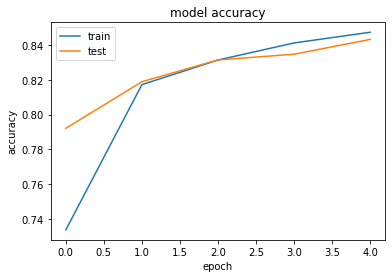

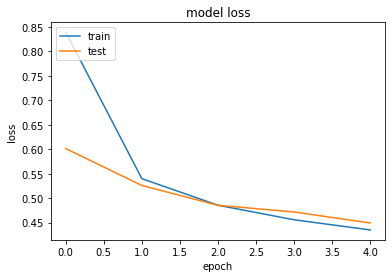

In [190]:
# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1))) #flatten the image into a vector
model.add(Dense(256, activation='relu')) #hidden layer with 512 nodes
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax')) #(refer to Lecture 6): output layer with 10 nodes uses softmax as the activation function because this is a multi-class classification problem

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
#change up batch size from SGD to mini-batch to full gradient
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Task 2: Build a Neural Network WITH Convolutional Layers

2. Build a neural network with the use of convolutional layers (you can decide other layer types you want to include in your network). Then, you can change: the number of convolutional layers, the number of filters, or activation function functions in convolutional layers, to be able to improve network performance.

In [157]:
#import packages
import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

#load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

#normalize inputs from 0-255 to 0.0-1.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

#encode the outputs with one-hot-coding
y_train = np_utils.to_categorical(y_train) #Converts a class vector (integers) to binary class matrix
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### Task 2: Model 1 - Initial Model

ERROR! Session/line number was not unique in database. History logging moved to new session 253
Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
flatten_49 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_172 (Dense)            (None, 10)                250890    
Total params: 251,722
Trainable params: 251,722
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.7434 - accuracy: 0.7480 - val_loss: 0.5668 - val_accuracy: 0.8007
Epoch 2/5
60000/60000 [==============================] - 9s 143us/step - loss: 0.525

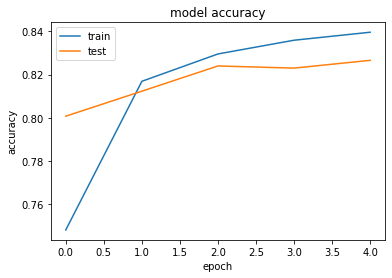

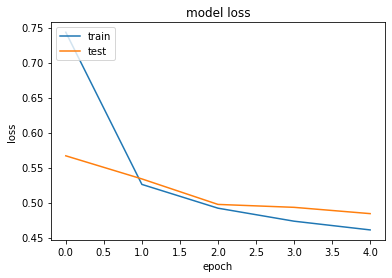

In [158]:
# Build the model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# Define optimizer
lrate = 0.002
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False) #Stochastic gradient descent optimizer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#plot the model
model.summary()

#train the model
tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Task 2: Experiments Inbetween Models

#### Experiment 1: changing the one hidden layer's kernel dimensions from 5x5 to 3x3

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
flatten_50 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_173 (Dense)            (None, 10)                250890    
Total params: 251,210
Trainable params: 251,210
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.7407 - accuracy: 0.7587 - val_loss: 0.5540 - val_accuracy: 0.8035
Epoch 2/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.5099 - accuracy: 0.8226 - val_loss: 0.5141 - val_accuracy: 0.8199
Epoch 3/5
60000/60000 [==========

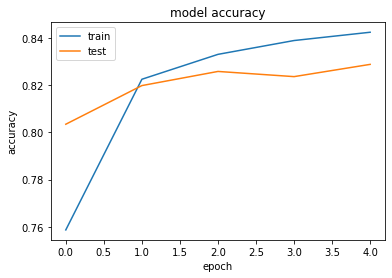

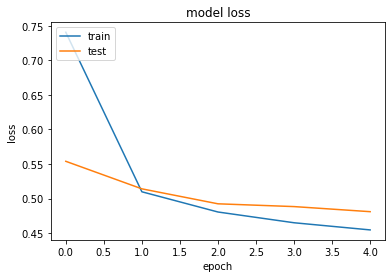

In [159]:
# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# Define optimizer
lrate = 0.002
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False) #Stochastic gradient descent optimizer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#plot the model
model.summary()

#train the model
tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Experiment 2: changing the number of filters for the one layer from 32 to 64

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
flatten_51 (Flatten)         (None, 50176)             0         
_________________________________________________________________
dense_174 (Dense)            (None, 10)                501770    
Total params: 502,410
Trainable params: 502,410
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 204us/step - loss: 0.7393 - accuracy: 0.7594 - val_loss: 0.5561 - val_accuracy: 0.8043
Epoch 2/5
60000/60000 [==============================] - 12s 196us/step - loss: 0.5119 - accuracy: 0.8221 - val_loss: 0.5161 - val_accuracy: 0.8188
Epoch 3/5
60000/60000 [========

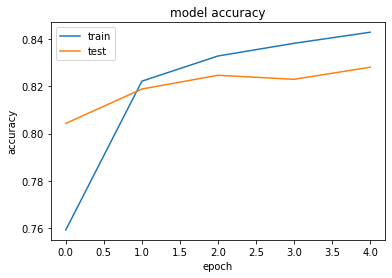

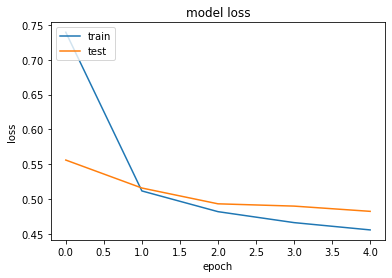

In [160]:
# Build the model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# Define optimizer
lrate = 0.002
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False) #Stochastic gradient descent optimizer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#plot the model
model.summary()

#train the model
tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Experiment 3: adding more convolutional layers with MaxPooling layers similar to VGG16 to try to extract different levels of features

ERROR! Session/line number was not unique in database. History logging moved to new session 254
Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 128)         0         
_______________________

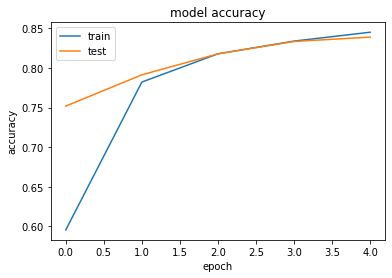

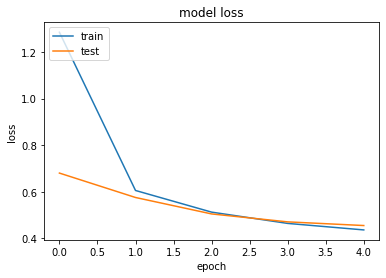

In [161]:
# Build the model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# Define optimizer
lrate = 0.002
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False) #Stochastic gradient descent optimizer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#plot the model
model.summary()

#train the model
tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Experiment 4: adding two dense layers to the end of Experiment 3 similar to VGG16

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 7, 7, 256)       

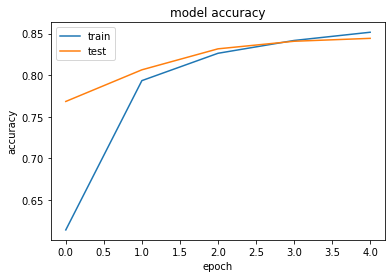

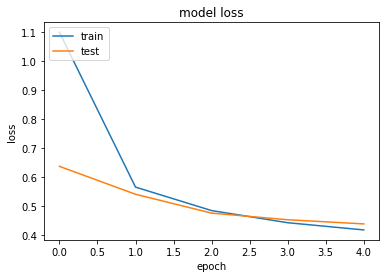

In [162]:
# Build the model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Flatten())
model.add(Dense(50))
model.add(Dense(50))
model.add(Dense(num_classes, activation='softmax'))

# Define optimizer
lrate = 0.002
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False) #Stochastic gradient descent optimizer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#plot the model
model.summary()

#train the model
tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Experiment 5: removing some relu layers from Experiment 6 and making one have sigmoid activation

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
flatten_54 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_180 (Dense)            (None, 50)              

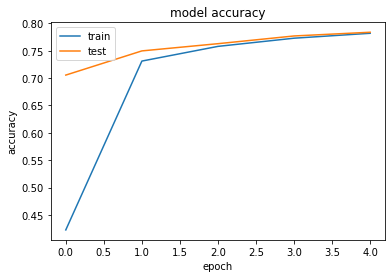

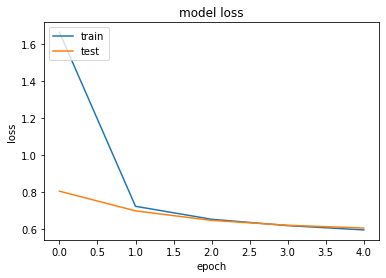

In [163]:
# Build the model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), padding='same', activation='sigmoid', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Flatten())
model.add(Dense(50))
model.add(Dense(50))
model.add(Dense(num_classes, activation='softmax'))

# Define optimizer
lrate = 0.002
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False) #Stochastic gradient descent optimizer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#plot the model
model.summary()

#train the model
tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Experiment 6: changing the sigmoid layer from Experiment 5 back to relu and adding two dropout layers

ERROR! Session/line number was not unique in database. History logging moved to new session 255
Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 7, 128)         0         
_______________________

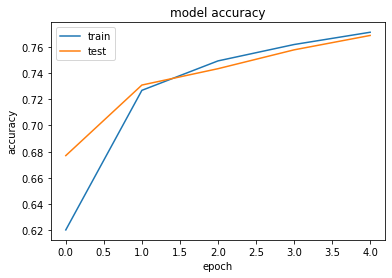

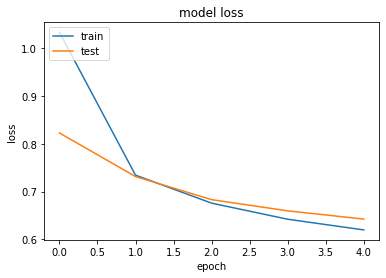

In [164]:
# Build the model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Flatten())
model.add(Dense(50))
model.add(Dense(50))
model.add(Dense(num_classes, activation='softmax'))

# Define optimizer
lrate = 0.002
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False) #Stochastic gradient descent optimizer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#plot the model
model.summary()

#train the model
tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Experiment 7: Taking inspiration from VGG16 and the 'Deeper CNN network and optimization' model from Lab 8

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 7, 7, 128)       

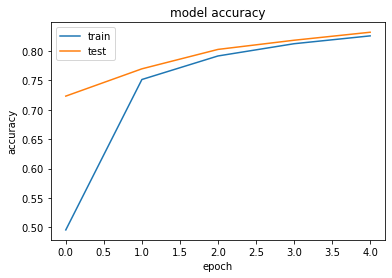

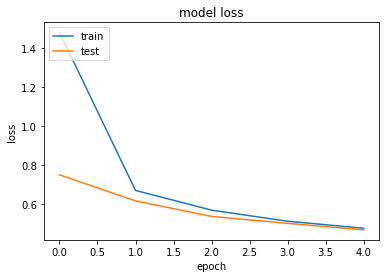

In [165]:
# Build a deeper CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Define optimizer
lrate = 0.002
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.7, decay=decay, nesterov=False) #Stochastic gradient descent optimizer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#plot the model
model.summary()

#train the model
tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#### Experiment 8: Taking the best performing experiment (Experiment 4) and change the optimizer settings (lrate from 0.002 to 0.001 and momentum from 0.7 to 0.9 (inspired from Lab 8: Deeper CNN network and optimization)

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 7, 7, 256)       

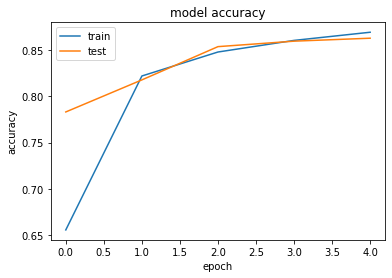

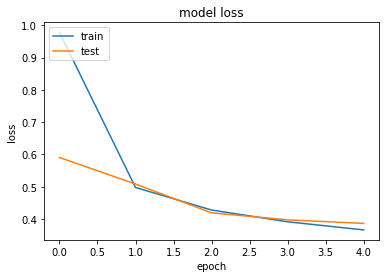

In [166]:
# Build the model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Flatten())
model.add(Dense(50))
model.add(Dense(50))
model.add(Dense(num_classes, activation='softmax'))

# Define optimizer
lrate = 0.001
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False) #Stochastic gradient descent optimizer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#plot the model
model.summary()

#train the model
tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Task 2: Model 2 - Better Accuracy

The second model for task 2 is based on the best performing experimental model above: Experiment 8. This model uses six Convolutional Layers with relu functions, two MaxPooling layers and a filter that doubles from 64 to 128 to 256, as well as two hidden Dense layers to achieve an accuracy of 86.28%

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 7, 7, 256)       

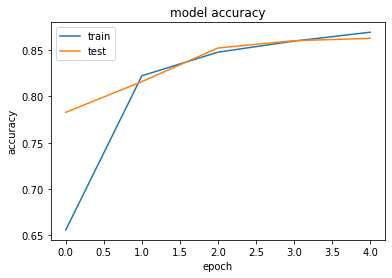

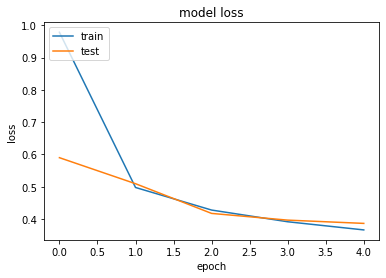

In [167]:
# Build the model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Flatten())
model.add(Dense(50))
model.add(Dense(50))
model.add(Dense(num_classes, activation='softmax'))

# Define optimizer
lrate = 0.001
epochs = 5
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False) #Stochastic gradient descent optimizer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#plot the model
model.summary()

#train the model
tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Task 3: Change the type of Optimizer or Learning Rate that you applied in the previous tasks

3. Change the type of optimizer or learning rate that you applied in the previous tasks, and see how these changes can influence model
performance (You can keep the final network structure you applied in task 2, and try at least one different optimizer setting).

### Task 3.1: Change Task 1 Optimizer or Learning Rate

Changing optimizer from sgd to adam

Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_84 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_284 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_285 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_286 (Dense)            (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.4803 - accuracy: 0.8291 - val_loss: 0.4539 - val_accuracy: 0.8372
Epoch 2/5
60000/60000 [==========================

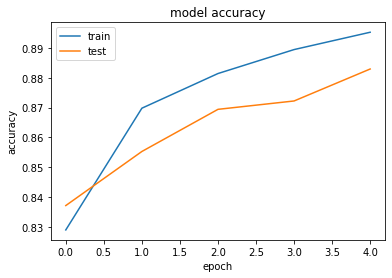

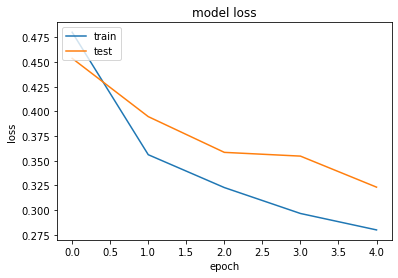

In [191]:
# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1))) #flatten the image into a vector
model.add(Dense(256, activation='relu')) #hidden layer with 512 nodes
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax')) #(refer to Lecture 6): output layer with 10 nodes uses softmax as the activation function because this is a multi-class classification problem

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
#change up batch size from SGD to mini-batch to full gradient
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Task 3.2: Change Task 2 Optimizer or Learning Rate

Changing optimizer from customised sgd to adam

Model: "sequential_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 7, 7, 256)      

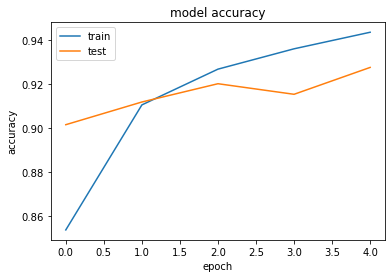

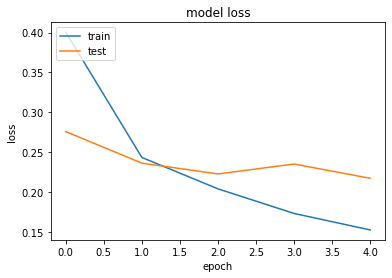

In [192]:
# Build the model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Flatten())
model.add(Dense(50))
model.add(Dense(50))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#plot the model
model.summary()

#train the model
tf.set_random_seed(1)
np.random.seed(1)

epochs = 5
# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=60, verbose=1)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#plot history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()